In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [ ]:
# Load data
df_results = pd.read_csv('results.csv')

In [13]:
df_results

,info_about_run,training_dataset,text_tower_name,text_head_name,image_tower_name,image_head_name,text_tower_weight,text_head_weight,image_tower_weight,image_head_weight,...,imageNet_0shot_small_top_1,imageNet_0shot_small_top_5,imageNet_0shot_tiny_top_1,imageNet_0shot_tiny_top_5,flickr30l_image2text_top_1,flickr30l_image2text_top_5,flickr30l_image2text_top_10,flickr30l_text2image_top_1,flickr30l_text2image_top_5,flickr30l_text2image_top_10
0,baseline bad baseline,unknown (flickr?),BERT medium (42M),Projection Head,ViT small (22M),Projection Head,bad_baseline_text_enc_best_1.pt,bad_baseline_text_proj_best_1.pt,bad_baseline_img_enc_best_1.pt,bad_baseline_img_proj_best_1.pt,...,6.343907,22.537563,7.692308,38.461538,3.125000,15.625000,31.149194,3.125000,15.625000,31.250000
1,baseline: baseline,unknown (flickr?),BERT medium (42M),Projection Head,ViT small (22M),Projection Head,prajjwal1/bert-medium,baseline_text_proj_best_1.pt,facebook/dino-vits16,baseline_img_proj_best_1.pt,...,7.212020,28.914858,14.615385,52.307692,44.556452,83.568548,93.346774,46.975806,82.862903,94.254032
2,baseline: good baseline,unknown (flickr?),BERT medium (42M),Small MLP Head,ViT small (22M),Projection Head,prajjwal1/bert-medium,good_baseline_text_proj_best_1.pt,facebook/dino-vits16,good_baseline_img_proj_best_1.pt,...,5.809683,26.427379,16.794872,50.256410,43.951613,83.770161,94.556452,43.850806,83.064516,94.354839
3,baseline: APE,unknown (flickr?),BERT medium (42M),Medium MLP Head,ViT small (22M),Projection Head,prajjwal1/bert-medium,APE_text_proj_best_1.pt,facebook/dino-vits16,APE_img_proj_best_1.pt,...,6.677796,22.971619,18.205128,47.948718,40.524194,80.342742,93.245968,41.129032,80.241935,92.943548
4,"LST (medium/medium), random init",MSCOCO,BERT base (108M),Projection Head,ViT base (86M),Projection Head,LST_text_enc_best_baseBERT_ViTb_mscoco_LilT.pt,LST_text_proj_best_baseBERT_ViTb_mscoco_LilT.pt,LST_img_enc_best_baseBERT_ViTb_mscoco_LilT.pt,LST_img_proj_best_baseBERT_ViTb_mscoco_LilT.pt,...,2.954925,17.245409,7.820513,36.538462,3.528226,15.625000,31.854839,3.326613,16.330645,31.350806
5,"LST (medium/medium), smart init",MSCOCO,BERT base (108M),Projection Head,ViT base (86M),Projection Head,LST_text_enc_best_baseBERT_ViTb_mscoco_LilT_sm...,LST_text_proj_best_baseBERT_ViTb_mscoco_LilT_s...,LST_img_enc_best_baseBERT_ViTb_mscoco_LilT_sma...,LST_img_proj_best_baseBERT_ViTb_mscoco_LilT_sm...,...,5.075125,19.482471,7.307692,40.000000,2.923387,17.943548,32.762097,2.822581,19.153226,34.979839
6,"LST (I=medium/T=medium), longer training",unknown (MSCOCO?),BERT base (108M),Projection Head,ViT base (86M),Projection Head,LST_text_enc_best_LST_Imedium_Tmedium_complete.pt,LST_text_proj_best_LST_Imedium_Tmedium_complet...,LST_img_enc_best_LST_Imedium_Tmedium_complete.pt,LST_img_proj_best_LST_Imedium_Tmedium_complete.pt,...,9.799666,35.525876,22.435897,63.333333,39.818548,77.620968,90.725806,42.540323,76.814516,88.508065
7,"LST (I=medium/T=medium), shorter training",unknown (MSCOCO? or maybe flickr?),BERT base (108M),Projection Head,ViT base (86M),Projection Head,LST_text_enc_best_LST_Imedium5_Tmedium3.pt,LST_text_proj_best_LST_Imedium5_Tmedium3.pt,LST_img_enc_best_LST_Imedium5_Tmedium3.pt,LST_img_proj_best_LST_Imedium5_Tmedium3.pt,...,9.632721,35.242070,25.384615,68.974359,34.072581,71.068548,85.987903,34.576613,70.463710,83.266129
8,LST (I=medium/T=small),unknown (MSCOCO?),BERT medium (42M),Projection Head,ViT base (86M),Projection Head,LST_text_enc_best_LST_Imedium_Tsmall.pt,LST_text_proj_best_LST_Imedium_Tsmall.pt,LST_img_enc_best_LST_Imedium_Tsmall.pt,LST_img_proj_best_LST_Imedium_Tsmall.pt,...,6.043406,30.016694,18.205128,54.615385,24.495968,62.600806,80.745968,24.395161,62.399194,79.838710
9,LST (I=medium/T=small),"unknown (MSCOCO?), special lr5",BERT medium (42M),Projection Head,ViT base (86M),Projection Head,LST_text_enc_best_LST_Imedium_Tsmall_lr5.pt,LST_text_proj_best_LST_Imedium_Tsmall_lr5.pt,LST_img_enc_best_LST_Imedium_Tsmall_lr5.pt,LST_img_proj_best_LS

## Baseline comparison

In [21]:
df_baseline = df_results.iloc[[0,1,3,2,21,22,12]]
df_baseline = df_baseline.drop(df_baseline.columns[[1,3,4,5,6,8,9]],axis=1)
df_baseline

,info_about_run,text_tower_name,text_head_weight,text_tower_params,text_head_params,image_tower_params,image_head_params,text_tower_trainable_params,text_head_trainable_params,image_tower_trainable_params,...,imageNet_0shot_small_top_1,imageNet_0shot_small_top_5,imageNet_0shot_tiny_top_1,imageNet_0shot_tiny_top_5,flickr30l_image2text_top_1,flickr30l_image2text_top_5,flickr30l_image2text_top_10,flickr30l_text2image_top_1,flickr30l_text2image_top_5,flickr30l_text2image_top_10
0,baseline bad baseline,BERT medium (42M),bad_baseline_text_proj_best_1.pt,41373184,788224,21813504,657152,41373184,788224,21813504,...,6.343907,22.537563,7.692308,38.461538,3.125000,15.625000,31.149194,3.125000,15.625000,31.250000
1,baseline: baseline,BERT medium (42M),baseline_text_proj_best_1.pt,41373184,788224,21813504,657152,0,788224,0,...,7.212020,28.914858,14.615385,52.307692,44.556452,83.568548,93.346774,46.975806,82.862903,94.254032
3,baseline: APE,BERT medium (42M),APE_text_proj_best_1.pt,41373184,14164736,21813504,657152,0,14164736,0,...,6.677796,22.971619,18.205128,47.948718,40.524194,80.342742,93.245968,41.129032,80.241935,92.943548
2,baseline: good baseline,BERT medium (42M),good_baseline_text_proj_best_1.pt,41373184,5772032,21813504,657152,0,5772032,0,...,5.809683,26.427379,16.794872,50.256410,43.951613,83.770161,94.556452,43.850806,83.064516,94.354839
21,benchmark classic LiT (costly version of weigh...,BERT medium (42M),costly_baseline_text_proj_best_1.pt,41373184,788224,21813504,657152,41373184,788224,0,...,8.397329,32.454090,20.512821,54.487179,61.895161,93.145161,97.580645,62.600806,92.641129,97.681452
22,benchmark LiT (small mlp instead of lin proj) ...,BERT medium (42M),LiT_text_proj_best_1.pt,41373184,5772032,21813504,657152,41373184,5772032,0,...,8.547579,33.956594,21.282051,56.666667,63.306452,91.129032,96.270161,64.919355,91.330645,96.673387
12,LST (I=small/T=small),BERT medium (42M),LST_text_proj_best_flickr.pt,41839177,788224,22263997,657152,728649,788224,599101,...,8.196995,32.520868,20.000000,61.153846,62.903226,91.129032,96.169355,61.088710,90.826613,96.673387


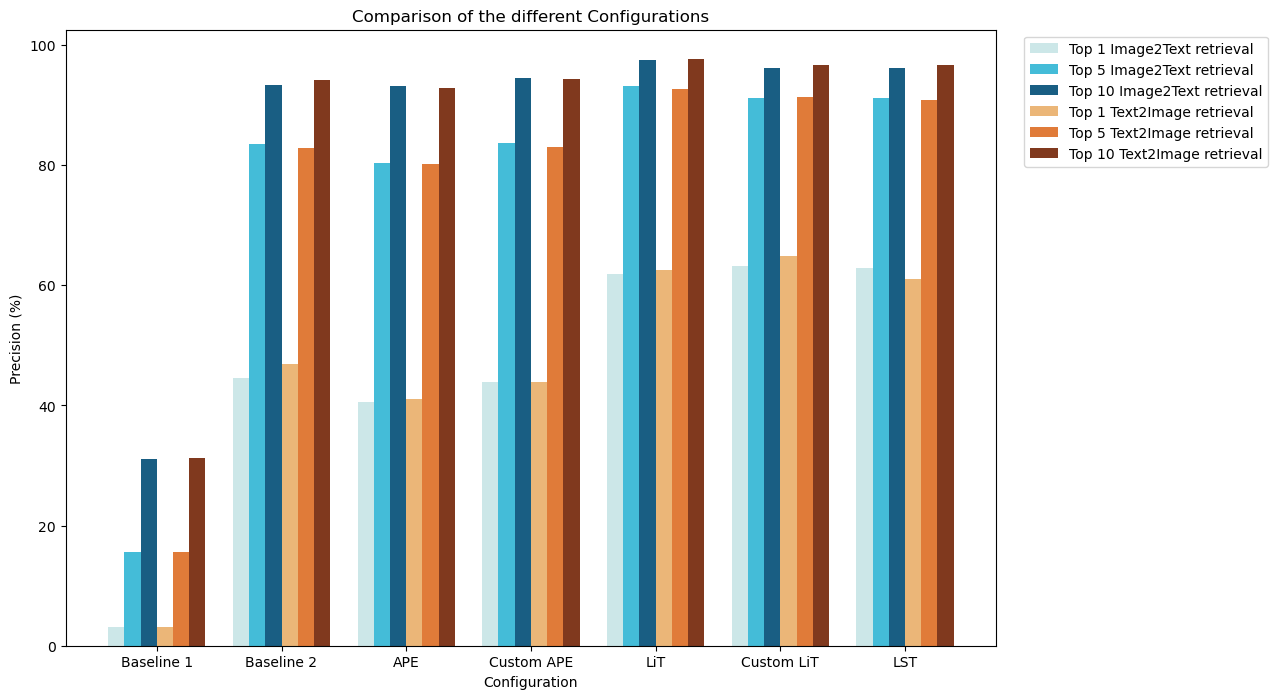

In [35]:
df = df_baseline

bar_width = 0.13

# Number of samples (rows)
num_samples = len(df)

# Custom sample names
sample_names = ["Baseline 1",'Baseline 2', 'APE', 'Custom APE',"LiT","Custom LiT","LST"]  # Replace with your list of sample names

# Create an array for each group position on the x-axis
x = np.arange(num_samples)

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Define a color palette
colors = ['#cce7e8', '#44bcd8', '#195e83', '#ebb678', '#e07b39', '#80391e']

# Plot each column
ax.bar(x - 2.5 * bar_width, df['flickr30l_image2text_top_1'], width=bar_width, label='Top 1 Image2Text retrieval',color=colors[0])
ax.bar(x - 1.5 * bar_width, df['flickr30l_image2text_top_5'], width=bar_width, label='Top 5 Image2Text retrieval',color=colors[1])
ax.bar(x - 0.5 * bar_width, df['flickr30l_image2text_top_10'], width=bar_width, label='Top 10 Image2Text retrieval',color=colors[2])
ax.bar(x + 0.5 * bar_width, df['flickr30l_text2image_top_1'], width=bar_width, label='Top 1 Text2Image retrieval',color=colors[3])
ax.bar(x + 1.5 * bar_width, df['flickr30l_text2image_top_5'], width=bar_width, label='Top 5 Text2Image retrieval',color=colors[4])
ax.bar(x + 2.5 * bar_width, df['flickr30l_text2image_top_10'], width=bar_width, label='Top 10 Text2Image retrieval',color=colors[5])


# Set the x-axis labels to the sample indices
ax.set_xticks(x)
ax.set_xticklabels(sample_names)

# Set axis labels and title
ax.set_xlabel('Configuration')
ax.set_ylabel('Precision (%)')
ax.set_title('Comparison of the different Configurations')

# Add a legend
ax.legend(bbox_to_anchor=(1.3, 1.))

# Show the plot
plt.show()

## Medium size baseline

In [12]:
df_medium_baseline = df_results.iloc[[20,26,10]]
df_medium_baseline = df_medium_baseline.drop(df_medium_baseline.columns[[3,4,5,6,8,9]],axis=1)
df_medium_baseline

,info_about_run,training_dataset,text_tower_name,text_head_weight,text_tower_params,text_head_params,image_tower_params,image_head_params,text_tower_trainable_params,text_head_trainable_params,...,imageNet_0shot_small_top_1,imageNet_0shot_small_top_5,imageNet_0shot_tiny_top_1,imageNet_0shot_tiny_top_5,flickr30l_image2text_top_1,flickr30l_image2text_top_5,flickr30l_image2text_top_10,flickr30l_text2image_top_1,flickr30l_text2image_top_5,flickr30l_text2image_top_10
20,benchmark classic LiT (I=small/T=medium),flickr?,BERT medium (42M),classic_LiT_text_proj_best_1.pt,41373184,788224,21813504,657152,41373184,788224,...,8.130217,33.138564,17.307692,61.538462,42.137097,74.596774,88.810484,41.129032,72.983871,86.693548
26,LoRA mscoco (I=medium/T=small),mscoco,BERT medium (42M),lora_text_proj_best_lora_mscoco_Imedium6_Tsmal...,41635328,788224,86979072,1050368,262144,788224,...,8.297162,32.454090,15.512821,59.615385,44.657258,79.435484,90.826613,45.262097,78.326613,90.826613
10,"LST (I=small/T=medium), lr3",unknown (MSCOCO?),BERT base (108M),LST_text_proj_best_LST_Ismall_Tmedium_lr3.pt,111267949,1050368,22263997,657152,2376301,1050368,...,9.298831,30.884808,22.307692,62.820513,37.701613,71.774194,85.282258,37.298387,72.681452,84.576613


In [20]:
df = df_medium_baseline

df = df.iloc[:,-6:]
df

,flickr30l_image2text_top_1,flickr30l_image2text_top_5,flickr30l_image2text_top_10,flickr30l_text2image_top_1,flickr30l_text2image_top_5,flickr30l_text2image_top_10
20,42.137097,74.596774,88.810484,41.129032,72.983871,86.693548
26,44.657258,79.435484,90.826613,45.262097,78.326613,90.826613
10,37.701613,71.774194,85.282258,37.298387,72.681452,84.576613


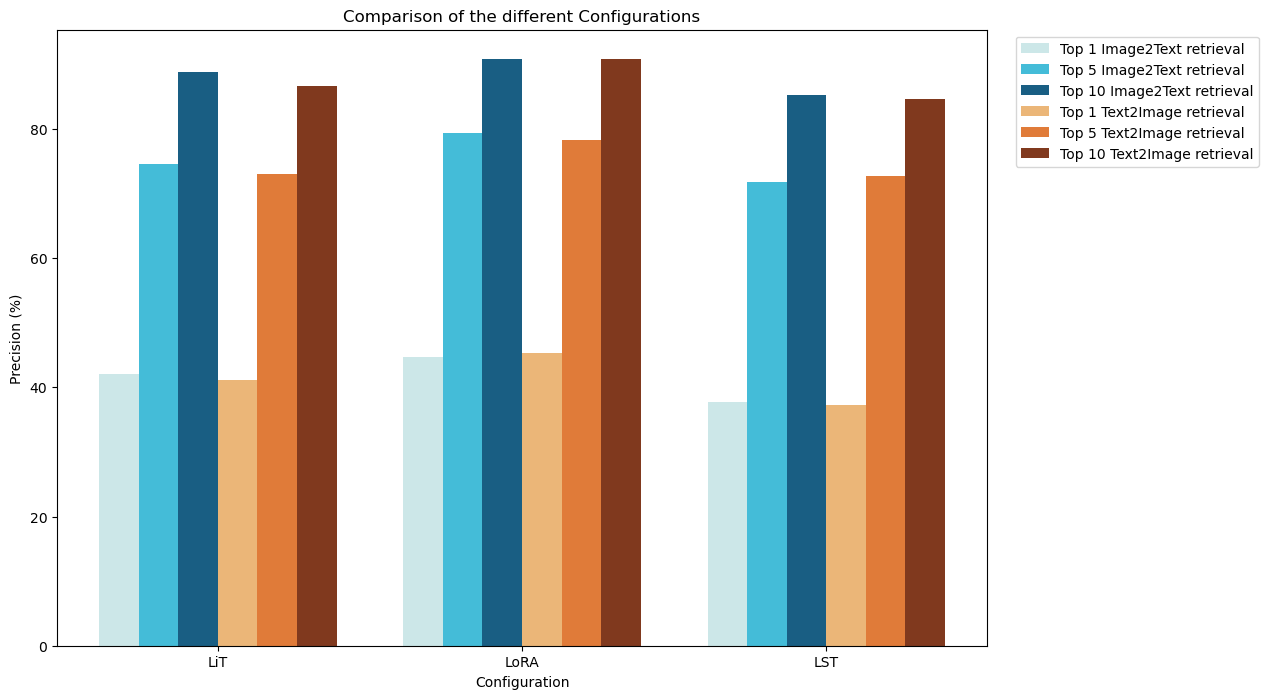

In [14]:
df = df_medium_baseline

bar_width = 0.13

# Number of samples (rows)
num_samples = len(df)

# Custom sample names
sample_names = ["LiT","LoRA","LST"]  # Replace with your list of sample names
#sample_names = [f"Sample {i}" for i in range(num_samples)]

# Create an array for each group position on the x-axis
x = np.arange(num_samples)

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Define a color palette
colors = ['#cce7e8', '#44bcd8', '#195e83', '#ebb678', '#e07b39', '#80391e']

# Plot each column
ax.bar(x - 2.5 * bar_width, df['flickr30l_image2text_top_1'], width=bar_width, label='Top 1 Image2Text retrieval',color=colors[0])
ax.bar(x - 1.5 * bar_width, df['flickr30l_image2text_top_5'], width=bar_width, label='Top 5 Image2Text retrieval',color=colors[1])
ax.bar(x - 0.5 * bar_width, df['flickr30l_image2text_top_10'], width=bar_width, label='Top 10 Image2Text retrieval',color=colors[2])
ax.bar(x + 0.5 * bar_width, df['flickr30l_text2image_top_1'], width=bar_width, label='Top 1 Text2Image retrieval',color=colors[3])
ax.bar(x + 1.5 * bar_width, df['flickr30l_text2image_top_5'], width=bar_width, label='Top 5 Text2Image retrieval',color=colors[4])
ax.bar(x + 2.5 * bar_width, df['flickr30l_text2image_top_10'], width=bar_width, label='Top 10 Text2Image retrieval',color=colors[5])


# Set the x-axis labels to the sample indices
ax.set_xticks(x)
ax.set_xticklabels(sample_names)

# Set axis labels and title
ax.set_xlabel('Configuration')
ax.set_ylabel('Precision (%)')
ax.set_title('Comparison of the different Configurations')

# Add a legend
ax.legend(bbox_to_anchor=(1.3, 1.))

# Show the plot
plt.show()

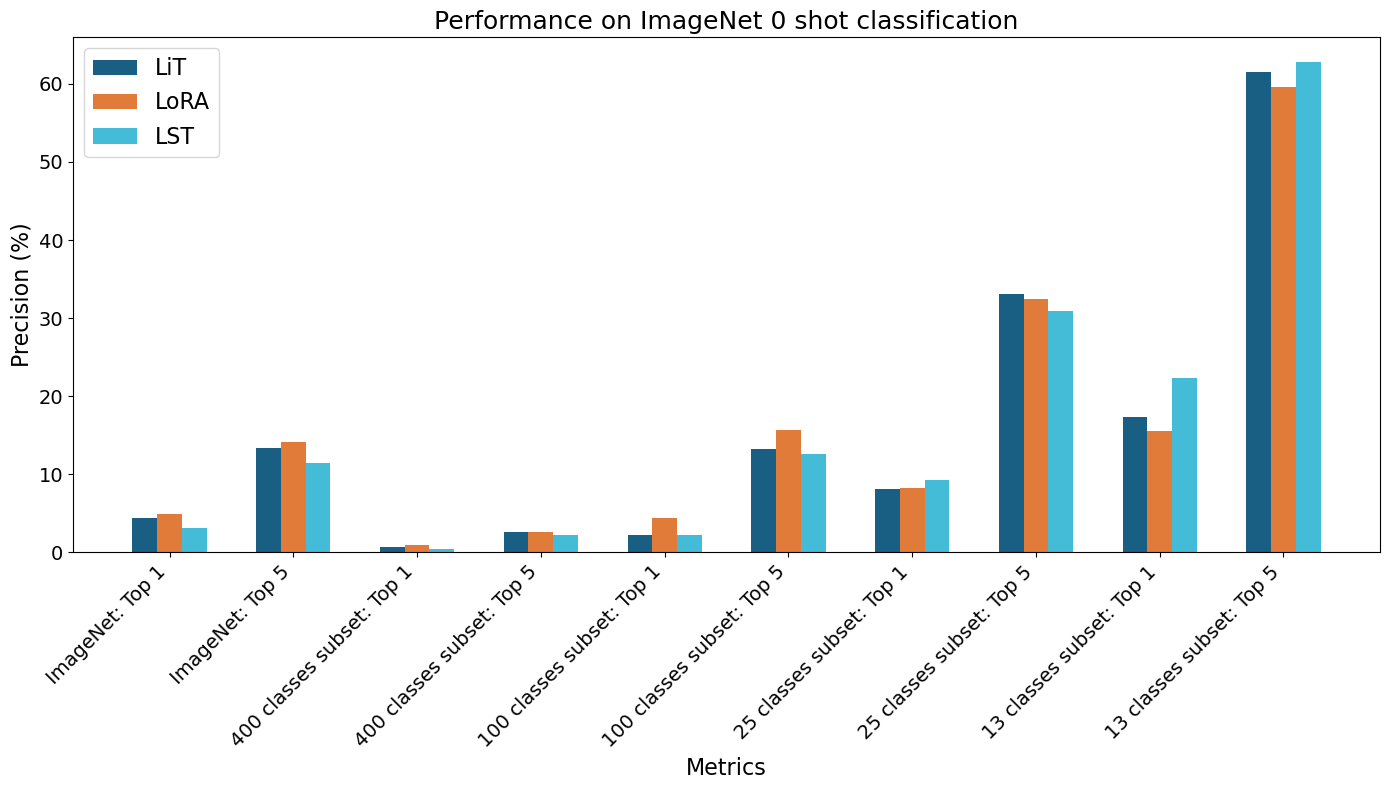

In [17]:
selected_metrics = ['imageNet_0shot_all_top_1', 'imageNet_0shot_all_top_5', 'imageNet_0shot_big_top_1', 'imageNet_0shot_big_top_5', 'imageNet_0shot_medium_top_1', 'imageNet_0shot_medium_top_5',"imageNet_0shot_small_top_1","imageNet_0shot_small_top_5","imageNet_0shot_tiny_top_1","imageNet_0shot_tiny_top_5"]

# Filter the DataFrame to include only the selected metrics
df = df_medium_baseline[selected_metrics]


# Define the bar width
bar_width = 0.2

# Number of samples (rows)
num_samples = len(df)

# Number of columns (metrics)
num_columns = len(df.columns)

# Create an array for each group position on the x-axis
x = np.arange(num_columns)

# Create subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Sample names (modify this list according to your samples)
sample_names = [ 'LiT', 'LoRA', 'LST']

# Define a color palette (using a colormap from matplotlib)
colors =  ['#195e83','#e07b39','#44bcd8',  '#80391e']

# Plot each row's data
for i in range(num_samples):
    ax.bar(x + i * bar_width, df.iloc[i].values, width=bar_width, color=colors[i % len(colors)], label=sample_names[i])
label_x_axis = ["ImageNet: Top 1","ImageNet: Top 5","400 classes subset: Top 1","400 classes subset: Top 5","100 classes subset: Top 1","100 classes subset: Top 5","25 classes subset: Top 1","25 classes subset: Top 5","13 classes subset: Top 1","13 classes subset: Top 5"]
# Set the x-axis labels to the selected metrics
ax.set_xticks(x + bar_width * (num_samples - 1) / 2)
ax.set_xticklabels(label_x_axis, rotation=45, ha='right', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
# Set axis labels and title
ax.set_xlabel('Metrics', fontsize=16)
ax.set_ylabel('Precision (%)', fontsize=16)
ax.set_title('Performance on ImageNet 0 shot classification', fontsize=18)

# Add a legend with diagonal labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

# Memory

In [3]:
# Load data
df_memory = pd.read_csv('memory.csv')
df_memory

,info_about_run,text_tower_name,text_head_name,image_tower_name,image_head_name,text_tower_params,text_head_params,image_tower_params,image_head_params,text_tower_trainable_params,text_head_trainable_params,image_tower_trainable_params,image_head_trainable_params,memory_before_model,memory_for_model,memory_forward_pass,mem_after_loss_gradient,mem_after_loss_backward,mem_after_optimizer
0,LoRA (I=small/T=small),BERT medium (42M),Projection Head,ViT small (22M),Projection Head,41635328,788224,22108416,657152,262144,788224,294912,657152,0,524306944,3377311232,3387883520,570099200,587036160
1,LoRA (I=small/T=medium),BERT base (108M),Projection Head,ViT small (22M),Projection Head,110072064,1050368,22108416,657152,589824,1050368,294912,657152,0,1076269568,5310377472,5320949760,1123569152,1145355776
2,LoRA (I=medium/T=small),BERT medium (42M),Projection Head,ViT base (86M),Projection Head,41635328,788224,86979072,1050368,262144,788224,589824,1050368,0,1044713984,5585404416,5596566528,1094897152,1116421632
3,LoRA (I=medium/T=medium),BERT base (108M),Projection Head,ViT base (86M),Projection Head,110072064,1050368,86979072,1050368,589824,1050368,589824,1050368,0,1595496960,7519532032,7530104320,1645450752,1671693824
4,LST (I=medium/T=medium),BERT base (108M),Projection Head,ViT base (86M),Projection Head,111267949,1050368,88174957,1050368,2376301,1050368,2377837,1050368,0,1653193216,4433719808,4445062144,1688714752,1743642112
5,LST (I=small/T=medium),BERT base (108M),Projection Head,ViT small (22M),Projection Head,111267949,1050368,22263997,657152,2376301,1050368,599101,657152,0,1112579072,3153297408,3163869696,1149640704,1188686848
6,LST (I=medium/T=small),BERT medium (42M),Projection Head,ViT base (86M),Projection Head,41839177,788224,88174957,1050368,728649,788224,2377837,1050368,0,1086580224,3179795456,3190367744,1123151360,1162806784
7,LST (I=small/T=small),BERT medium (42M),Projection Head,ViT small (22M),Projection Head,41839177,788224,22263997,657152,728649,788224,599101,657152,0,547145728,1894296576,1904868864,581750784,604443648
8,APE (I=small/T=small),BERT medium (42M),Medium MLP Head,ViT small (22M),Projection Head,41373184,14164736,21813504,657152,0,14164736,0,657152,0,626731520,684225024,694797312,722851328,842343936
9,APE (I=small/T=medium),BERT base (108M),Medium MLP Head,ViT small (22M),Projection Head,109482240,14689024,21813504,657152,0,14689024,0,657152,0,1178825216,1241889280,1252461568,1278418432,1402236416


# Baseline small

In [4]:
df_baseline_memory = df_memory.iloc[[28,24,8,23,16,15,0,7]]
df_baseline_memory = df_baseline_memory.drop(df_baseline_memory.columns[[1,2,3,4,13]],axis=1)
df_baseline_memory

,info_about_run,text_tower_params,text_head_params,image_tower_params,image_head_params,text_tower_trainable_params,text_head_trainable_params,image_tower_trainable_params,image_head_trainable_params,memory_for_model,memory_forward_pass,mem_after_loss_gradient,mem_after_loss_backward,mem_after_optimizer
28,bad baseline (I=small/T=small),41373184,788224,21813504,657152,41373184,788224,21813504,657152,519850496,4227787264,4239719424,817890304,1334535168
24,baseline (I=small/T=small),41373184,788224,21813504,657152,0,788224,0,657152,519850496,576328192,586900480,563512832,576386560
8,APE (I=small/T=small),41373184,14164736,21813504,657152,0,14164736,0,657152,626731520,684225024,694797312,722851328,842343936
23,good_baseline (I=small/T=small),41373184,5772032,21813504,657152,0,5772032,0,657152,559589888,615903744,626476032,622138880,674489856
16,classic_LiT (I=small/T=small),41373184,788224,21813504,657152,41373184,788224,0,657152,519850496,1996919296,2007491584,728360448,1070405120
15,LiT (I=small/T=small),41373184,5772032,21813504,657152,41373184,5772032,0,657152,559589888,2037805568,2048377856,786986496,1169294848
0,LoRA (I=small/T=small),41635328,788224,22108416,657152,262144,788224,294912,657152,524306944,3377311232,3387883520,570099200,587036160
7,LST (I=small/T=small),41839177,788224,22263997,657152,728649,788224,599101,657152,547145728,1894296576,1904868864,581750784,604443648


In [5]:
total_params = ['text_tower_params', 'text_head_params', 'image_tower_params', 'image_head_params']
trainable_params = ["text_tower_trainable_params","text_head_trainable_params","image_tower_trainable_params","image_head_trainable_params"]

df_baseline_memory['Total params'] = df_baseline_memory[total_params].sum(axis=1)
df_baseline_memory['Trainable params'] = df_baseline_memory[trainable_params].sum(axis=1)

df_baseline_memory = df_baseline_memory.drop(columns=total_params)
df_baseline_memory = df_baseline_memory.drop(columns=trainable_params)

df_baseline_memory.iloc[:,[1,2,3,4,5]] = df_baseline_memory.iloc[:,[1,2,3,4,5]] / 1024 / 1024

df_baseline_memory

,info_about_run,memory_for_model,memory_forward_pass,mem_after_loss_gradient,mem_after_loss_backward,mem_after_optimizer,Total params,Trainable params
28,bad baseline (I=small/T=small),495.768066,4031.932129,4043.311523,780.000977,1272.711914,64632064,64632064
24,baseline (I=small/T=small),495.768066,549.629395,559.711914,537.407715,549.685059,64632064,1445376
8,APE (I=small/T=small),597.697754,652.527832,662.610352,689.364746,803.321777,78008576,14821888
23,good_baseline (I=small/T=small),533.666504,587.371582,597.454102,593.317871,643.243652,69615872,6429184
16,classic_LiT (I=small/T=small),495.768066,1904.410645,1914.493164,694.618652,1020.817871,64632064,42818560
15,LiT (I=small/T=small),533.666504,1943.402832,1953.485352,750.528809,1115.126465,69615872,47802368
0,LoRA (I=small/T=small),500.018066,3220.854980,3230.937500,543.688965,559.841309,65189120,2002432
7,LST (I=small/T=small),521.798828,1806.541992,1816.624512,554.800781,576.442383,65548550,2773126


## Baseline Medium


In [21]:
df_baseline_memory = df_memory.iloc[[19,3,4]]
df_baseline_memory = df_baseline_memory.drop(df_baseline_memory.columns[[1,2,3,4,13]],axis=1)
df_baseline_memory

,info_about_run,text_tower_params,text_head_params,image_tower_params,image_head_params,text_tower_trainable_params,text_head_trainable_params,image_tower_trainable_params,image_head_trainable_params,memory_for_model,memory_forward_pass,mem_after_loss_gradient,mem_after_loss_backward,mem_after_optimizer
19,classic_LiT (I=medium/T=medium),109482240,1050368,86389248,1050368,109482240,1050368,0,1050368,1586059776,4843954688,4854526976,2086835712,3016328704
3,LoRA (I=medium/T=medium),110072064,1050368,86979072,1050368,589824,1050368,589824,1050368,1595496960,7519532032,7530104320,1645450752,1671693824
4,LST (I=medium/T=medium),111267949,1050368,88174957,1050368,2376301,1050368,2377837,1050368,1653193216,4433719808,4445062144,1688714752,1743642112


In [22]:
total_params = ['text_tower_params', 'text_head_params', 'image_tower_params', 'image_head_params']
trainable_params = ["text_tower_trainable_params","text_head_trainable_params","image_tower_trainable_params","image_head_trainable_params"]

df_baseline_memory['Total params'] = df_baseline_memory[total_params].sum(axis=1)
df_baseline_memory['Trainable params'] = df_baseline_memory[trainable_params].sum(axis=1)

df_baseline_memory = df_baseline_memory.drop(columns=total_params)
df_baseline_memory = df_baseline_memory.drop(columns=trainable_params)

df_baseline_memory.iloc[:,[1,2,3,4,5]] = df_baseline_memory.iloc[:,[1,2,3,4,5]] / 1024 / 1024

df_baseline_memory

,info_about_run,memory_for_model,memory_forward_pass,mem_after_loss_gradient,mem_after_loss_backward,mem_after_optimizer,Total params,Trainable params
19,classic_LiT (I=medium/T=medium),1512.584473,4619.555176,4629.637695,1990.161621,2876.595215,197972224,111582976
3,LoRA (I=medium/T=medium),1521.584473,7171.184570,7181.267090,1569.224121,1594.251465,199151872,3280384
4,LST (I=medium/T=medium),1576.607910,4228.324707,4239.141602,1610.483887,1662.866699,201543642,6854874


# memory scale


In [36]:
df_memory_scale = pd.read_csv("memory_scale.csv")
df_memory_scale["peak_memory"] = df_memory_scale["peak_memory"] / (1024 * 1024 * 1024)
df_memory_scale

,configuration,batch_size,peak_memory
0,LiT,4,2.846105
1,LiT,8,2.865705
2,LiT,16,3.067727
3,LiT,32,4.562047
4,LiT,64,7.582265
5,lora,4,2.237988
6,lora,8,2.898135
7,lora,16,4.277329
8,lora,32,7.012956
9,LST,4,1.905711


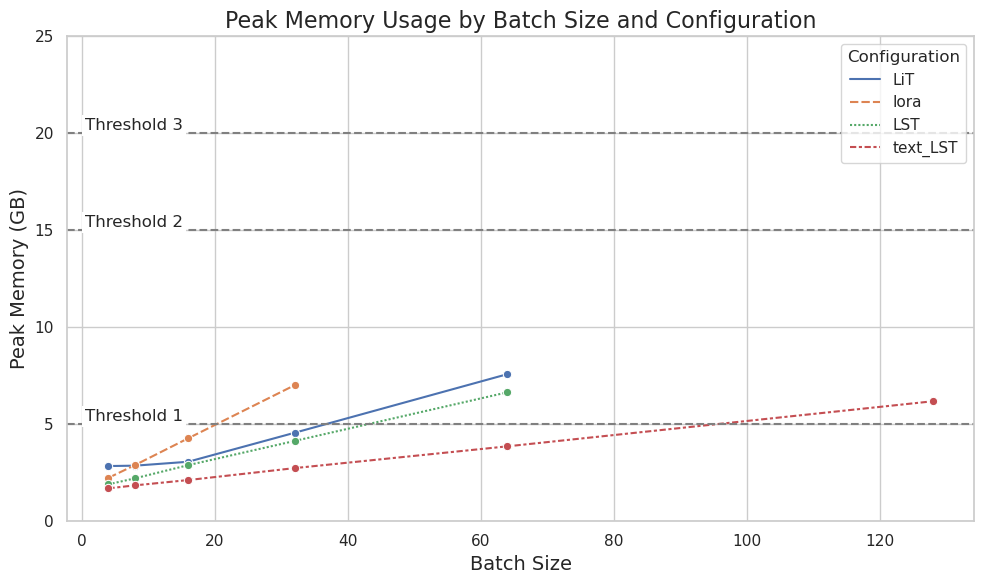

In [38]:
df = df_memory_scale

# Dictionary with threshold lines and their labels
thresholds = {5: "Threshold 1", 15: "Threshold 2", 20: "Threshold 3"}

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='batch_size', y='peak_memory', hue='configuration', marker='o', style='configuration')

# Set axis labels and title
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Peak Memory (GB)', fontsize=14)
plt.title('Peak Memory Usage by Batch Size and Configuration', fontsize=16)

# Set y-axis limit
plt.ylim(0, 25)

# Add horizontal lines with annotations
for y_value, label in thresholds.items():
    plt.axhline(y=y_value, color='grey', linestyle='--')
    plt.text(0.5, y_value, label, verticalalignment='bottom', horizontalalignment='left', backgroundcolor='white', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', pad=2))

# Show the plot
plt.legend(title='Configuration')
plt.tight_layout()
plt.show()

[ 2.71496376  2.89167374  3.30915349  4.40035213  7.60770598 18.1222399
 55.55061272]
[ 2.23132098  2.90980329  4.27149539  7.01378958 12.57401786 23.99703406]
[ 1.9035105   2.22777916  2.87283137  4.14899542  6.64556195 11.41564874
 20.06363729]
[ 1.70075006  1.84594977  2.13623132  2.71632301  3.87462076  6.1836737
 10.77160932 19.82679958]


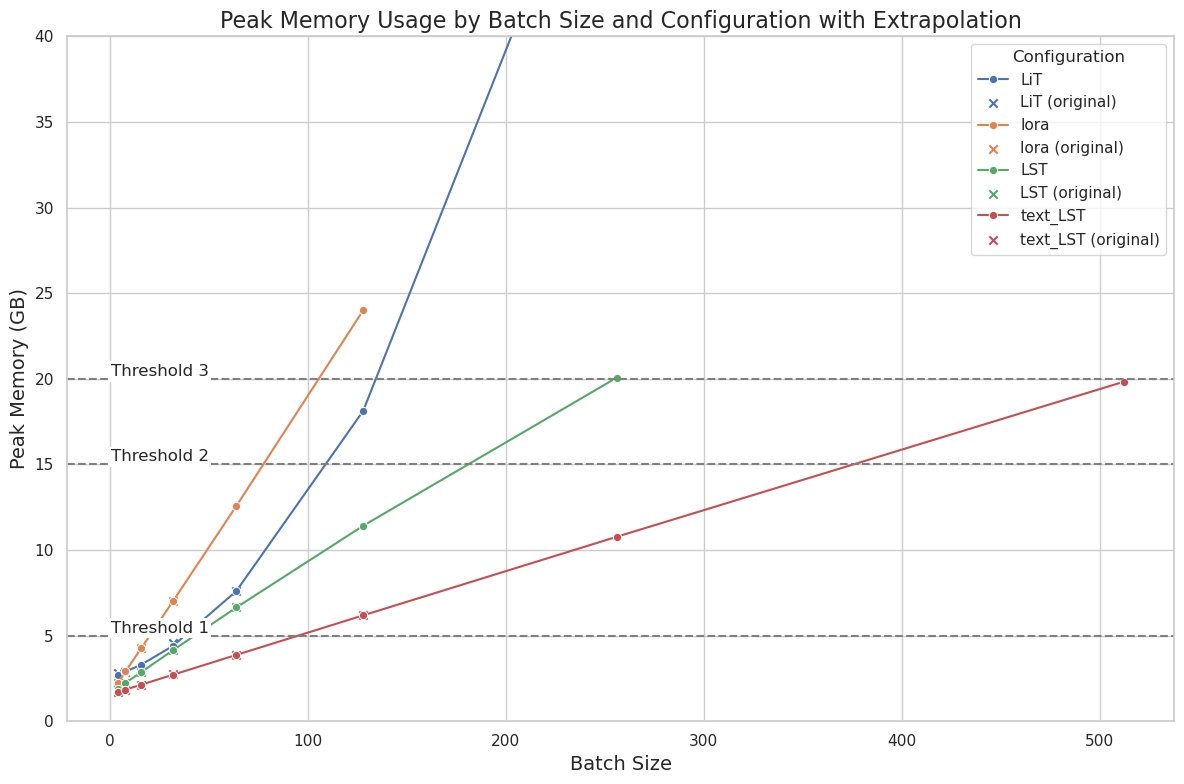

In [42]:

# Dictionary with threshold lines and their labels
thresholds = {5: "Threshold 1", 15: "Threshold 2", 20: "Threshold 3"}

# Function to predict and plot extrapolated values
def predict_and_plot(df, config, ax):
    # Filter data for the specific configuration
    config_data = df[df['configuration'] == config]
    X = np.array(config_data['batch_size']).reshape(-1, 1)
    y = config_data['peak_memory']

    # Create polynomial features
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict for existing and next 5 batch sizes
    next_batch_sizes = [max(X.flatten()) * (2**i) for i in range(1, 3)]
    all_batch_sizes = np.concatenate([X.flatten(), next_batch_sizes])
    all_batch_sizes_poly = poly.transform(all_batch_sizes.reshape(-1, 1))
    predicted_peak_memory = model.predict(all_batch_sizes_poly)

    print(predicted_peak_memory)
    
    # Plot the existing and extrapolated data
    sns.lineplot(x=all_batch_sizes, y=predicted_peak_memory, ax=ax, label=config, marker='o')
    ax.scatter(X, y, label=f'{config} (original)', marker='x')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot data for each configuration
for config in df['configuration'].unique():
    predict_and_plot(df, config, ax)

# Set axis labels and title
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Peak Memory (GB)', fontsize=14)
plt.title('Peak Memory Usage by Batch Size and Configuration with Extrapolation', fontsize=16)

# Set y-axis limit
plt.ylim(0, 40)

# Add horizontal lines with annotations
for y_value, label in thresholds.items():
    plt.axhline(y=y_value, color='grey', linestyle='--')
    plt.text(0.5, y_value, label, verticalalignment='bottom', horizontalalignment='left', backgroundcolor='white', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', pad=2))

# Show the legend and plot
plt.legend(title='Configuration')
plt.tight_layout()
plt.show()